# <a name="C"> SOMMAIRE <a/>
 
**<a href="#C1"> I.) Description </a>**
  - <a href ="#C11"> 1.1) Affichage des données </a>
  - <a href ="#C12"> 1.2) La structure des données </a>
  - <a href ="#C13"> 1.3) Analyse des données </a>
  - <a href ="#C14"> 1.4) Analyse des données </a>
 
 
**<a href="#C2"> II.) Traitement des données </a>**
 - <a href ="#C21"> 2.1) Selection colonnes importantes </a>
 - <a href ="#C22"> 2.2) Remplacement de colonne </a>
 - <a href ="#C23"> 2.3) Traitement des NaN </a>
 - <a href ="#C24"> 2.4) Traitement des données duplicatées </a>
 - <a href ="#C25"> 2.5) Traitement outliers </a>
 - <a href ="C26"> 2.6) Export csv <a/>
 
  
**<a href="#C3"> III.) Analyse des variables </a>**
    
**<a href="#C4"> IV.) Exploration Corpus</a>**

 
 **<a href="#C5"> V.) Natural Language Processing (NLP) </a>**
 - <a href ="#C51"> 5.1) Text Cleaning </a>
  + <a href ="#C511"> 5.1.1)  Capitalization/ Lower case <a/>
  + <a href ="#C511"> 5.1.1)  Remove punctuations <a/>
 - <a href ="#C52"> 5.2) Text Preprocessing: </a>
  + <a href ="#C521"> 5.2.1) Tokenization </a>
  + <a href ="#C522"> 5.2.2) Stopwords </a>
  + <a href ="#C523"> 5.2.3) Stemming </a>
  + <a href ="#C524"> 452.4) Part of Speech Tagging (POS Tagging): </a>
  + <a href ="#C525"> 5.2.5) Lemmatization </a>

**<a href="#C6"> VI.) Classification du textes <a/>**
  + <a href ="#C61"> 6.1) Fonctions communes (Evaluation et representation) <a/>
    + <a href ="#C611"> 6.1.1)  Fonction Evaluation <a/>
    + <a href ="#C612"> 6.1.2)  Fonction Représentation <a/>
  + <a href ="#C62"> 6.2) Sentence Embedding <a/>
    + <a href ="#C621"> 6.2.1) Bag of Words (BoW) </a>
    + <a href ="#C622"> 6.2.2) Term Frequency-Inverse Document Frequency (TF-IDF) </a>
    + <a href ="#C623"> 6.2.3) Word2Vec </a>
    + <a href ="#C624"> 6.2.4) BERT - Bidirectional Encoder Representations from Transformers </a>
    + <a href ="#C625"> 6.2.5) USE - Universal Sentence Encoder </a>

# Importation des librairies

In [1]:
import os, sys, time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importation de dataset

In [2]:
sns.set()

In [3]:
# le dossier
data = "./Flipkart/"
os.listdir(data)

['flipkart.csv', 'Images']

In [4]:
# Importer la dataframe
fn = data + 'flipkart.csv'
df = pd.read_csv(fn)

# <a name="C1"> I.) Description <a/>

## <a name="C11"> 1.1) Affichage des données <a/>

In [5]:
# afficher les 5 premiers 
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
# afficher les 5 derniers 
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."


In [7]:
# afficher 10 eéléments au hasard 
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
565,51eb5d22eda4be2a409a336651c50bb1,2016-01-07 05:50:25 +0000,http://www.flipkart.com/sonata-8097ym03-analog...,Sonata 8097YM03 Analog Watch - For Women,"[""Watches >> Wrist Watches >> Sonata Wrist Wat...",WATDZ2ZQT4ZNRHPU,999.0,999.0,51eb5d22eda4be2a409a336651c50bb1.jpg,True,Sonata 8097YM03 Analog Watch - For Women - Bu...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
946,2cc24452688ed35dfbff566e22e53c95,2016-01-01 13:15:34 +0000,http://www.flipkart.com/organistick-silver-lab...,Organistick Silver Label Lipstick 10 g,"[""Beauty and Personal Care >> Makeup >> Lips >...",LSKE6FWHDDWY7J5T,149.0,149.0,2cc24452688ed35dfbff566e22e53c95.jpg,False,Flipkart.com: Buy Organistick Silver Label Lip...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty..."
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
748,532fd66d24261d77d9d8b18cfd1ca0f2,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-lavender...,Mxofere Combo Lavender Rose Jasmine Papaya Alo...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEBVA88GDNS2HV,295.0,295.0,532fd66d24261d77d9d8b18cfd1ca0f2.jpg,False,Buy Mxofere Combo Lavender Rose Jasmine Papaya...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Ty..."
1020,6eaa9bd9e9285d77891bb76d30e6ebe7,2016-03-03 06:06:42 +0000,http://www.flipkart.com/aroma-comfort-polyeste...,Aroma Comfort Polyester Blue Floral Eyelet Lon...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEFPYYRJZHDHJX,999.0,899.0,6eaa9bd9e9285d77891bb76d30e6ebe7.jpg,False,Specifications of Aroma Comfort Polyester Blue...,No rating available,No rating available,Aroma Comfort,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


## <a name="C12"> 1.2) La structure des données <a/>

In [8]:
# Nbre de lignes et colonnes
df.shape

(1050, 15)

In [9]:
# Types des colonnes
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [11]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [12]:
# Nbre de valeurs uniques par colonne
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

## <a name="C13"> 1.3) Analyse des données <a/>

### 1.4.1) NaN

In [13]:
# Nbre de valeurs manquantes par colonne
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [14]:
# pourcentage de valeurs manquantes par colonne
df.isnull().mean().round(3)

uniq_id                    0.000
crawl_timestamp            0.000
product_url                0.000
product_name               0.000
product_category_tree      0.000
pid                        0.000
retail_price               0.001
discounted_price           0.001
image                      0.000
is_FK_Advantage_product    0.000
description                0.000
product_rating             0.000
overall_rating             0.000
brand                      0.322
product_specifications     0.001
dtype: float64

<AxesSubplot:>

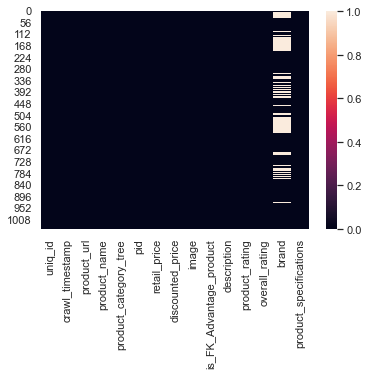

In [15]:
# représentation graphique des colonne par rapport auxNaN
sns.heatmap(df.isnull())

### 1.4.2) Duplicated

In [16]:
# Nbre de lignes duplicaquées
df.duplicated().sum()

0

In [17]:
# Nbre de valeurs duplicatées par colonnes
for col in df.columns :
    n = df.duplicated(subset = col).sum()
    print(f" col : {col} --------------> duplicated {n}")

 col : uniq_id --------------> duplicated 0
 col : crawl_timestamp --------------> duplicated 901
 col : product_url --------------> duplicated 0
 col : product_name --------------> duplicated 0
 col : product_category_tree --------------> duplicated 408
 col : pid --------------> duplicated 0
 col : retail_price --------------> duplicated 695
 col : discounted_price --------------> duplicated 625
 col : image --------------> duplicated 0
 col : is_FK_Advantage_product --------------> duplicated 1048
 col : description --------------> duplicated 0
 col : product_rating --------------> duplicated 1023
 col : overall_rating --------------> duplicated 1023
 col : brand --------------> duplicated 559
 col : product_specifications --------------> duplicated 65


# <a name="C2"> II.) Traitement des données <a/>
    
######  <a href="#C"> Retour Sommaire <a/>

## <a name="C21"> 2.1)  Selection colonnes importantes <a/>

In [20]:
da = df.loc[: , ["product_name", "discounted_price", "is_FK_Advantage_product", "product_category_tree", "image", "description", 'brand' ]]
da.head()

,product_name,discounted_price,is_FK_Advantage_product,product_category_tree,image,description,brand
0,Elegance Polyester Multicolor Abstract Eyelet ...,899.0,False,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance
1,Sathiyas Cotton Bath Towel,449.0,False,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas
2,Eurospa Cotton Terry Face Towel Set,NaN,False,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa
3,SANTOSH ROYAL FASHION Cotton Printed King size...,1299.0,False,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION
4,Jaipur Print Cotton Floral King sized Double B...,698.0,False,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print


## <a name="C22"> 2.2) Remplacement de colonne <a/>

In [21]:
import re

# Extraire du texte
da['category'] = da['product_category_tree'].apply(lambda x: re.search(r'"(.*?)>>', x).group(1) if re.search(r'"(.*?)>>', x) else '')
da = da.drop(columns = 'product_category_tree')
da.head()

,product_name,discounted_price,is_FK_Advantage_product,image,description,brand,category
0,Elegance Polyester Multicolor Abstract Eyelet ...,899.0,False,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Home Furnishing
1,Sathiyas Cotton Bath Towel,449.0,False,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Baby Care
2,Eurospa Cotton Terry Face Towel Set,NaN,False,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,1299.0,False,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,698.0,False,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,Home Furnishing


In [22]:
da.shape

(1050, 7)

## <a name="C23"> 2.3) Traitement des NaN <a/>

In [23]:
da.isnull().sum()

product_name                 0
discounted_price             1
is_FK_Advantage_product      0
image                        0
description                  0
brand                      338
category                     0
dtype: int64

In [25]:
# Remplacer NaN de la variable "brand" par la valeur ""
da.loc[da['brand'].isnull(), 'brand']= ""

In [26]:
# Remplacer NaN de la variable "brand" par la moyenne de la colonne
moyenne = da['discounted_price'].mean()
da['discounted_price'].fillna(moyenne, inplace=True)

In [27]:
da.isnull().sum()

product_name               0
discounted_price           0
is_FK_Advantage_product    0
image                      0
description                0
brand                      0
category                   0
dtype: int64

## <a name="C24"> 2.4) Traitement des données duplicatée <a/>

In [28]:
# Nbre de valeurs duplicatées par colonnes
for col in da.columns :
    n = da.duplicated(subset = col).sum()
    print(f" col : {col} --------------> duplicated {n}")

 col : product_name --------------> duplicated 0
 col : discounted_price --------------> duplicated 625
 col : is_FK_Advantage_product --------------> duplicated 1048
 col : image --------------> duplicated 0
 col : description --------------> duplicated 0
 col : brand --------------> duplicated 559
 col : category --------------> duplicated 1043


Pas de problème de duplication. Les colonnes ou i y'a des valeurs dupliquées sont normales

## <a name="C25"> 2.5) Traitement Outliers <a/>

In [29]:
da.describe()

,discounted_price
count,1050.000000
mean,1584.527169
std,7471.535866
min,35.000000
25%,340.000000
50%,600.000000
75%,1199.750000
max,201000.000000


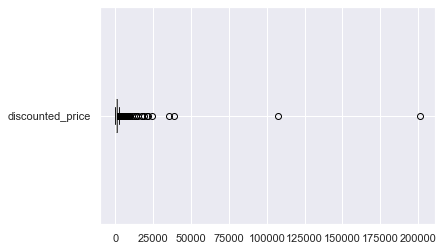

In [30]:
da.boxplot(column='discounted_price',vert=False)
plt.show()

In [31]:
# Nbre de valeurs uniques par colonne
da.nunique()

product_name               1050
discounted_price            425
is_FK_Advantage_product       2
image                      1050
description                1050
brand                       491
category                      7
dtype: int64

In [32]:
data = da
data.isnull().sum()

product_name               0
discounted_price           0
is_FK_Advantage_product    0
image                      0
description                0
brand                      0
category                   0
dtype: int64

## <a name="C26"> 2.6) Export csv <a/>

##### Importer dans le repertoir courant

In [33]:
# Exporter le fichier
da.to_csv(".\data.csv",index=False)

##### Importer dans un autre repertoire

In [35]:
import os

# Chemin d'accès complet du fichier source
source_file = r"C:\Users\dmedc\Documents\DATA SCIENCE\PROJET\Projet 6\Analyse_texte" # "r" pour créer une chaîne brute (raw string), qui ignore les séquences d'échappement(caratère spéciaux)

# Chemin d'accès complet du répertoire de destination
destination_dir = r"C:\Users\dmedc\Documents\DATA SCIENCE\PROJET\Projet 6\Analyse_image"

# Chemin d'accès complet du fichier de destination
destination_file = os.path.join(destination_dir, "data.csv")

# Exportation du DataFrame vers le fichier de destination
da.to_csv(destination_file, index=False)

# <a name="C3"> III.) Analyse des variables <a/>
    
######  <a href="#C"> Retour Sommaire <a/>

### Variable : "is_FK_Advantage_product"

In [38]:
# Nbre d'occurence de la variable "is_FK_Advantage_product"
data.is_FK_Advantage_product.value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

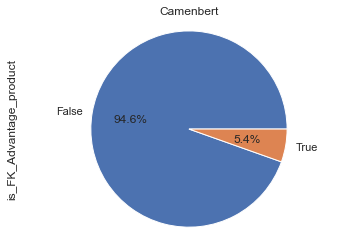

In [39]:
# Diagramme en secteurs
data["is_FK_Advantage_product"].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")
plt.axis('equal')
plt.title("Camenbert")
plt.show() # Affiche le graphique

### Variable : "product_name"

C:\Users\dmedc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


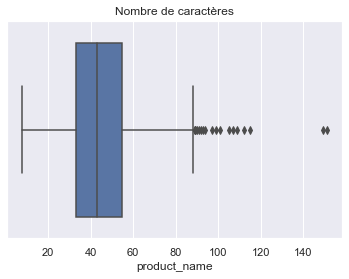

In [40]:
# Compter le nbre de caractère 
tmp_description =  data.product_name.str.len()
# Créer une figure et un axe
fig, ax = plt.subplots()

# Utiliser Seaborn pour créer Graphique boite à moustache
sns.boxplot(tmp_description, ax=ax)
ax.set_title("Nombre de caractères") # Ajouter un titre au graphique
plt.show() # Afficher le graphique

### Variable : "description"

C:\Users\dmedc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


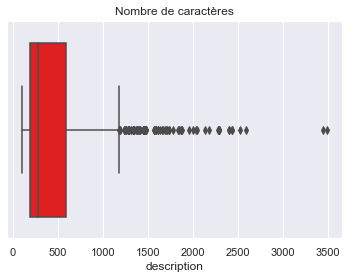

In [41]:
# Compter le nbre de caractère 
tmp_description = data.description.str.len()
# Créer une figure et un axe
fig, ax = plt.subplots()

# Utiliser Seaborn pour créer Graphique boite à moustache
sns.boxplot(tmp_description, ax=ax, color="red")
ax.set_title("Nombre de caractères") # Ajouter un titre au graphique
plt.show() # Afficher le graphique

### Variable : "brand"

C:\Users\dmedc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


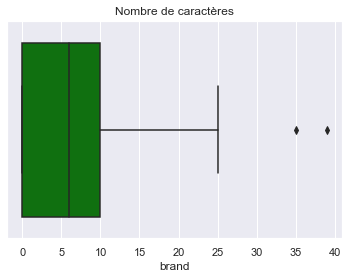

In [42]:
# Compter le nbre de caractère 
tmp_description = data.brand.str.len()
# Créer une figure et un axe
fig, ax = plt.subplots()

# Utiliser Seaborn pour créer Graphique boite à moustache
sns.boxplot(tmp_description, ax=ax, color="green")
ax.set_title("Nombre de caractères") # Ajouter un titre au graphique
plt.show() # Afficher le graphique

# <a name="C4"> IV.) Exploration Corpus <a/>
    
######  <a href="#C"> Retour Sommaire <a/>

In [36]:
data.head()

,product_name,discounted_price,is_FK_Advantage_product,image,description,brand,category
0,Elegance Polyester Multicolor Abstract Eyelet ...,899.000000,False,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Home Furnishing
1,Sathiyas Cotton Bath Towel,449.000000,False,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Baby Care
2,Eurospa Cotton Terry Face Towel Set,1584.527169,False,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,1299.000000,False,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,698.000000,False,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,Home Furnishing


In [43]:
data = data.loc[: , ["product_name", "is_FK_Advantage_product", "description", 'brand', 'category' ]]

#### Fusionner les colonnes

In [44]:
# Fusionner avec retour à la ligne
data['product'] = data["product_name"] + '\n' + data["description"] + "\n" + data["brand"]

#### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

X = data['is_FK_Advantage_product']

# Créons des encodeurs de labels 
encodeur_Advantage_product = LabelEncoder()
# Ajustons et transformons les données avec l'encodeur
Advantage_product = encodeur_Advantage_product.fit_transform(X)

In [46]:
data['advantage'] = Advantage_product
data.drop(columns = ['product_name', 'is_FK_Advantage_product', 'description', 'brand'], inplace=True)
data.sample(5)

,category,product,advantage
711,Home Furnishing,Frabjous Floral Single Quilts & Comforters Mul...,0
943,Home Decor & Festive Needs,"Al Fakher Pegs'N'Pipes Mint, Double Apple Hook...",0
449,Baby Care,Saba Garments Baby Girl's Gathered Dress\nKey ...,0
238,Kitchen & Dining,Metallino Hard Anodised Kadhai 1.2 L\nBuy Meta...,0
21,Watches,Now SP-ETHNIC Analog Watch - For Boys\nNow SP...,0


In [47]:
data["category"].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [48]:
# data.to_csv("text/data_cleaned.csv", index= False)

#### Print N random products

In [49]:
df_samp = data.sample(10)

for index, row in df_samp.iterrows():
    txt_1 = f"advantage : {row['advantage']}\n"
    txt_2 = row['product']
    print(txt_1 + txt_2 + "\n\n")

advantage : 0
CHINMAY KIDS Printed Cotton Padded Mosquito Net
Specifications of CHINMAY KIDS Printed Cotton Padded Mosquito Net (Multicolour) Convenience Features Washable Yes General Brand CHINMAY KIDS Model Name Printed Cotton Padded Capacity 1 person Model ID CVPC021 Color Multicolour Dimensions Weight 100 g Height 36 inch Width 18 inch In the Box Sales Package 1 MOSQUITO NET
CHINMAY KIDS


advantage : 0
Kool Kidz DMK-011-PK 01 Analog Watch  - For Boys, Girls
Kool Kidz DMK-011-PK 01 Analog Watch  - For Boys, Girls - Buy Kool Kidz DMK-011-PK 01 Analog Watch  - For Boys, Girls  DMK-011-PK 01 Online at Rs.476 in India Only at Flipkart.com. Multi-color Strap, Round Dial, Metal Case - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!



advantage : 0
Zyxel VMG1312-B10A VDSL2 Wireless N VDSL2 4-port Gateway with USB
Buy Zyxel VMG1312-B10A VDSL2 Wireless N VDSL2 4-port Gateway with USB only for Rs. 6249 from Flipkart.com. Only Genuine Pr

# <a name="C5"> V.) Natural Language Processing (NLP) <a/>
    
######  <a href="#C"> Retour Sommaire <a/>


La bibliothèque Natural Language Toolkit **(NLTK)** est un puissant outil en Python pour travailler avec le traitement du langage naturel (NLP). Elle propose diverses fonctionnalités pour le prétraitement de texte, l'analyse syntaxique, la tokenisation, le stemming, la lemmatisation, la recherche de motifs et bien plus encore. Voici comment vous pouvez commencer à utiliser NLTK :

In [50]:
import nltk

# Télécharge les données nécessaires
nltk.download('punkt') # Tokenisation
nltk.download("stopwords") # Stopwords
nltk.download('wordnet') # Lemmatisation
nltk.download("omw-1.4") # Lemmatisation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## <a name="C51"> 5.1) Text Cleaning <a/>

### <a name="C511"> 5.1.1) Capitalization/ Lower case <a/>

In [51]:
# mettre en miniscule la colonne texte
data['data_lower'] = data['product'].apply(lambda x: x.lower())
data.sample(5)

,category,product,advantage,data_lower
1047,Baby Care,Uberlyfe Extra Large Pigmented Polyvinyl Films...,0,uberlyfe extra large pigmented polyvinyl films...
243,Kitchen & Dining,Suruchi Kadhai 4.5 L\nBuy Suruchi Kadhai 4.5 L...,0,suruchi kadhai 4.5 l\nbuy suruchi kadhai 4.5 l...
544,Watches,"Only Kidz 20600 Digital Watch - For Boys, Gir...",1,"only kidz 20600 digital watch - for boys, gir..."
135,Kitchen & Dining,Prithish Working on my own Grass Ceramic Mug\n...,0,prithish working on my own grass ceramic mug\n...
760,Watches,Luba rk526 Rked Analog Watch - For Women\nLub...,0,luba rk526 rked analog watch - for women\nlub...


### <a name="C512"> 5.1.2)  Remove punctuations <a/>

In [52]:
# Libraries et packages pour texte (pre-)processing 
import string
import re

In [53]:
# Créer la fonction pour supprimer la ponctuation
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# supprimer la punctuations du texte
data["data_punct"] = data["data_lower"].apply(lambda x: remove_punct(x))

In [54]:
print(data.data_lower[2])
print("-------------")
print(data.data_punct[2])

eurospa cotton terry face towel set
key features of eurospa cotton terry face towel set size: small height: 9 inch gsm: 360,eurospa cotton terry face towel set (20 piece face towel set, assorted) price: rs. 299 eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. all our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. note: our product is 100% cotton, so it is susceptible to shrinkage. product color may vary from the picture. size may vary by ±3% wash care: wash in cold water, do not iron, do not bleach, flat dry, wash before first use. size- face towel - 23 cms x 23 cms.,specifications of eurospa cotton terry face towel set (20 piece face towel set, assorted) bath towel features material cotton terry design shuvam general brand eurospa 

In [55]:
data['data_clean'] = data['data_punct']
data.drop(columns = ['data_lower','data_punct'], inplace=True)

## <a name="C52"> 5.2) Text Preprocessing: <a/>

### <a name="C521"> 5.2.1) Tokenization <a/>
    
 la tokenisation est le processus de décomposition d'un élément de données en unités plus petites et significatives appelées jetons. Ces jetons peuvent être des mots individuels dans une phrase

In [56]:
# Librairie de tokenization.
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt') 

data['tokenized'] = data['data_clean'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <a name="C522"> 5.2.2) Stopwords <a/>
    
Ce sont les mots très courants dans la langue étudiée ("et", "à", "le"... en français) qui n'apportent pas de valeur informative pour la compréhension du "sens" d'un document et corpus

In [57]:
from nltk.corpus import stopwords

# Créer un stopwords anglais
stop = set(stopwords.words('english'))

data['stopwords_removed'] = data['tokenized'].apply(lambda x: [word for word in x if word not in stop])

### <a name="C523"> 5.2.3) Stemming <a/>
    
Cela consiste à ne conserver que la racine des mots étudiés. L'idée étant de supprimer les suffixes, préfixes et autres des mots afin de ne conserver que leur origine.

In [58]:
from nltk.stem import SnowballStemmer

# créer une fonction 
def snowball_stemmer(text):
    stemmer = nltk.SnowballStemmer("english")   # Créer un stemmer anglaisais
    stems = [stemmer.stem(i) for i in text]
    return stems

# Appliquer le stemming sur chaque mot
data['snowball_stemmer'] = data['stopwords_removed'].apply(lambda x: snowball_stemmer(x))

### <a name="C524"> 5.2.4) Part of Speech Tagging (POS Tagging): <a/>

**Le POS tagging**, ou étiquetage morphosyntaxique en français, est une tâche importante en traitement automatique du langage naturel (TALN). Il consiste à attribuer à chaque mot d'un texte une étiquette grammaticale ou de catégorie grammaticale (noun, verb, adjective, and etc.), appelée "part-of-speech" (POS) en anglais.

In [59]:
from nltk.corpus import wordnet
import nltk
nltk.download('brown')
# Importer le corpus Brown
from nltk.corpus import brown

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [60]:
%time 

# Appliquer le POS Tagging sur chaque mot
data['combined_postag_wnet'] = data['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

CPU times: total: 0 ns
Wall time: 0 ns


### <a name="C525"> 5.2.5) Lemmatization: <a/>

Le processus de « lemmatisation » consiste à représenter les mots (ou « lemmes » 😉) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. L'idée étant encore une fois de ne conserver que le sens des mots utilisés dans le corpus.

#### Lemmatization without POS Tagging:

In [61]:
%time 

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download("omw-1.4")

# créer une fonction 
def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

# Appliquer le stemming sur chaque mot
lemmatizer = WordNetLemmatizer()

data['lemmatize_wo_pos'] = data['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data['lemmatize_wo_pos'] = data['lemmatize_wo_pos'].apply(lambda x: [word for word in x if word not in stop])

CPU times: total: 0 ns
Wall time: 0 ns


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmedc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Lemmatization with POS Tagging:

In [62]:
%time 

# Test with POS Tagging
lemmatizer = WordNetLemmatizer()

data['lemmatize_w_pos'] = data['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
data['lemmatize_w_pos'] = data['lemmatize_w_pos'].apply(lambda x: [word for word in x if word not in stop]) 

# double vérification pour supprimer stop words
data['lemmatize_text'] = [' '.join(map(str, l)) for l in data['lemmatize_w_pos']] 

CPU times: total: 0 ns
Wall time: 0 ns


In [63]:
# Initialisez le lemmatiseur WordNet
#lemmatizer = WordNetLemmatizer()

#lemmatizer = WordNet
# Fonction pour lemmatiser une ligne de texte
def lemmatize_row(row):
    tokens = row['lemmatize_text'].split()  # Divisez le texte en tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatisez les tokens
    unique_lemmatized_tokens = list(set(lemmatized_tokens))  # Obtenez les tokens uniques après la lemmatisation
    return ' '.join(unique_lemmatized_tokens)  # Rejoignez les tokens uniques lemmatisés en une seule chaîne

# Appliquez la fonction de lemmatisation à chaque ligne du DataFrame
data['lemmatize_text_unique'] = data.apply(lemmatize_row, axis=1)

In [64]:
data.head()

,category,product,advantage,data_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_wo_pos,lemmatize_w_pos,lemmatize_text,lemmatize_text_unique
0,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,0,elegance polyester multicolor abstract eyelet ...,"[elegance, polyester, multicolor, abstract, ey...","[elegance, polyester, multicolor, abstract, ey...","[eleg, polyest, multicolor, abstract, eyelet, ...","[(elegance, n), (polyester, n), (multicolor, n...","[elegance, polyester, multicolor, abstract, ey...","[elegance, polyester, multicolor, abstract, ey...",elegance polyester multicolor abstract eyelet ...,world id 899 amount box close look brand cm lo...
1,Baby Care,Sathiyas Cotton Bath Towel\nSpecifications of ...,0,sathiyas cotton bath towel\nspecifications of ...,"[sathiyas, cotton, bath, towel, specifications...","[sathiyas, cotton, bath, towel, specifications...","[sathiya, cotton, bath, towel, specif, sathiya...","[(sathiyas, n), (cotton, n), (bath, n), (towel...","[sathiyas, cotton, bath, towel, specification,...","[sathiyas, cotton, bath, towel, specification,...",sathiyas cotton bath towel specification sathi...,ideal men design id size sale package mediam r...
2,Baby Care,Eurospa Cotton Terry Face Towel Set\nKey Featu...,0,eurospa cotton terry face towel set\nkey featu...,"[eurospa, cotton, terry, face, towel, set, key...","[eurospa, cotton, terry, face, towel, set, key...","[eurospa, cotton, terri, face, towel, set, key...","[(eurospa, n), (cotton, n), (terry, n), (face,...","[eurospa, cotton, terry, face, towel, set, key...","[eurospa, cotton, terry, face, towel, set, key...",eurospa cotton terry face towel set key featur...,dry may 299 feeling men 20 id box use weight t...
3,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,0,santosh royal fashion cotton printed king size...,"[santosh, royal, fashion, cotton, printed, kin...","[santosh, royal, fashion, cotton, printed, kin...","[santosh, royal, fashion, cotton, print, king,...","[(santosh, n), (royal, a), (fashion, n), (cott...","[santosh, royal, fashion, cotton, printed, kin...","[santosh, royal, fashion, cotton, print, king,...",santosh royal fashion cotton print king sized ...,perfact bedsheet fit wash 90 fashion print des...
4,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...,0,jaipur print cotton floral king sized double b...,"[jaipur, print, cotton, floral, king, sized, d...","[jaipur, print, cotton, floral, king, sized, d...","[jaipur, print, cotton, floral, king, size, do...","[(jaipur, n), (print, n), (cotton, n), (floral...","[jaipur, print, cotton, floral, king, sized, d...","[jaipur, print, cotton, floral, king, sized, d...",jaipur print cotton floral king sized double b...,waranty id 220 box use weight look brand cm 75...


In [65]:
data.shape

(1050, 12)

#### Affichage de la troisième ligne

In [66]:
print(data.tokenized[2])
print('\n')
print("---------------")
print('\n')
print(data.stopwords_removed[2])
print('\n')
print("---------------")
print('\n')
print(data.snowball_stemmer[2])
print('\n')
print("---------------")
print('\n')
print(data.combined_postag_wnet[2])

['eurospa', 'cotton', 'terry', 'face', 'towel', 'set', 'key', 'features', 'of', 'eurospa', 'cotton', 'terry', 'face', 'towel', 'set', 'size', 'small', 'height', '9', 'inch', 'gsm', '360eurospa', 'cotton', 'terry', 'face', 'towel', 'set', '20', 'piece', 'face', 'towel', 'set', 'assorted', 'price', 'rs', '299', 'eurospa', 'brings', 'to', 'you', 'an', 'exclusively', 'designed', '100', 'soft', 'cotton', 'towels', 'of', 'export', 'quality', 'all', 'our', 'products', 'have', 'soft', 'texture', 'that', 'takes', 'care', 'of', 'your', 'skin', 'and', 'gives', 'you', 'that', 'enriched', 'feeling', 'you', 'deserve', 'eurospa', 'has', 'been', 'exporting', 'its', 'bath', 'towels', 'to', 'lot', 'of', 'renowned', 'brands', 'for', 'last', '10', 'years', 'and', 'is', 'famous', 'for', 'its', 'fine', 'prints', 'absorbency', 'softness', 'and', 'durability', 'note', 'our', 'product', 'is', '100', 'cotton', 'so', 'it', 'is', 'susceptible', 'to', 'shrinkage', 'product', 'color', 'may', 'vary', 'from', 'the', 

In [67]:
print(data.lemmatize_wo_pos[2])
print('\n')
print("---------------")
print('\n')
print(data.lemmatize_w_pos[2])
print('\n')
print("---------------")
print('\n')
print(data.lemmatize_text[2])
print("---------------")
print('\n')
print(data.lemmatize_text_unique[2])

['eurospa', 'cotton', 'terry', 'face', 'towel', 'set', 'key', 'feature', 'eurospa', 'cotton', 'terry', 'face', 'towel', 'set', 'size', 'small', 'height', '9', 'inch', 'gsm', '360eurospa', 'cotton', 'terry', 'face', 'towel', 'set', '20', 'piece', 'face', 'towel', 'set', 'assorted', 'price', 'r', '299', 'eurospa', 'brings', 'exclusively', 'designed', '100', 'soft', 'cotton', 'towel', 'export', 'quality', 'product', 'soft', 'texture', 'take', 'care', 'skin', 'give', 'enriched', 'feeling', 'deserve', 'eurospa', 'exporting', 'bath', 'towel', 'lot', 'renowned', 'brand', 'last', '10', 'year', 'famous', 'fine', 'print', 'absorbency', 'softness', 'durability', 'note', 'product', '100', 'cotton', 'susceptible', 'shrinkage', 'product', 'color', 'may', 'vary', 'picture', 'size', 'may', 'vary', '±3', 'wash', 'care', 'wash', 'cold', 'water', 'iron', 'bleach', 'flat', 'dry', 'wash', 'first', 'use', 'size', 'face', 'towel', '23', 'cm', 'x', '23', 'cmsspecifications', 'eurospa', 'cotton', 'terry', 'fac

# <a name="C6"> VI.) Classification du texte<a/>
    
######  <a href="#C"> Retour Sommaire <a/>

## <a name="C61"> 6.1) Fonctions communes (Evaluation et representation) <a/>

    
K-means est l'agorithme de classification utilisé.
    
K-means est un algorithme de regroupement non supervisé utilisé pour partitionner un ensemble de données en k clusters distincts. L'algorithme vise à attribuer chaque point de données à l'un des k clusters de telle sorte que la similarité entre les points au sein d'un même cluster soit maximisée, tandis que la similarité entre les points de différents clusters soit minimisée.

In [68]:
# Import des librairies
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [69]:
# Liste des unique valeur de la colonne
l_cat = list(set(data['category']))

# liste des valeurs de la colonne "advantage"
y_cat_num = [(1-l_cat.index(data.iloc[i]['category'])) for i in range(len(data))]

print(l_cat, len(y_cat_num))

['Home Furnishing ', 'Home Decor & Festive Needs ', 'Kitchen & Dining ', 'Computers ', 'Baby Care ', 'Watches ', 'Beauty and Personal Care '] 1050


### <a name="C611"> 6.1.1) Fonction Evaluation <a/>

In [70]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    #num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, n_iter=500, init='random', random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    # ARI score avec arrondit à 4 décimales
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

### <a name="C612"> 6.1.2)  Fonction Représentation <a/>

In [71]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    # créer un sous-tracé dans la figure  dans une grille 1x2 et en première position (côté gauche).
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    # Créer un sous-tracé dans la figure  dans une grille 1x2 et en deuxième position (côté droite).
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

## <a name="C62"> 6.2) Sentence Enbedding <a/>
    
Le « sentence embedding » (encodage de phrase) est une technique utilisée en traitement automatique du langage naturel pour représenter une phrase sous forme de vecteur numérique. Il s'agit de convertir une phrase en un espace vectoriel continu où des mesures de similarité peuvent être calculées entre les vecteurs représentant différentes phrases.

Différentes méthodes peuvent être utilisées pour créer des embeddings de phrases

Nous présenterons différentes techniques de "Sentence Embeddings", permettant de générer des features à partir de phrases (ici descriptions de produits)
L'objectif est de pouvoir séparer les produits de façon automatique, via un T-SNE, qui permet une réduction des features en 2 dimensions

+ La colonne "lemmatize_text" sera utilisée pour le Deep learning (BoW, Tf-idf et Word2vec)

+ La colonne "lemmatize_text_unique" sera utilisée pour le Deep learning (USE et BERT) ; car il faut une représentation textuelle continue du texte de description

### <a name="C621">6.2.1) Bag of Words (BoW) : <a/>
    
Le "Bag of Words" (sac de mots) est une méthode utilisée en traitement automatique du langage naturel pour représenter un texte en se concentrant uniquement sur la fréquence des mots qui le composent, sans tenir compte de l'ordre ou de la structure grammaticale.
    
Un n-gramme est une séquence de n mots consécutifs extraits d'un texte.

#### a.) corpus : the first three element  of column "lemmatize_text"

##### Uni-gram

Unigramme : Un n-gramme de taille 1, simplement un seul mot.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# créer une fonction cv
def cv(texte, ngram = 1, MAX_NB_WORDS = 75000):
    
    # Initialisation du vectoriseur BoW avec les paramètres spécifiés
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    
    # Transforme les textes en une matrice de comptage de mots
    emb = count_vectorizer.fit_transform(texte).toarray()
    
    # Afficher le nombre de fonctionnalités extraites (correspondant au nombre de mots uniques) 
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    
    return emb, count_vectorizer

In [73]:
# créer une fonction print_out
def print_out(emb, feat, ngram, compared_sentence=0):
    
    print(ngram,"bag-of-words: ")
    # Obtenir la liste de noms de mots (tokens) extraits du corpus.
    print(feat.get_feature_names(), "\n")
    print('-------------------------------------------------------------------', "\n")
    
    print(ngram,"bag-of-feature: ")
    # Accéder au vocabulaire (ensemble de mots uniques et leurs indices)
    print(test_cv_1gram.vocabulary_, "\n")
    print('-------------------------------------------------------------------', "\n")
    
    print("BoW matrix:")
    # Créer un DataFrame à partir de la matrice BoW transposée
    print(pd.DataFrame(emb.transpose(), index = feat.get_feature_names()).head(), "\n")
    print('-------------------------------------------------------------------', "\n")
    
    print(ngram,"vector example:")
    # Accéder à la représentation BoW d'une phrase spécifique
    print(data["lemmatize_text"][compared_sentence],"\n")
    print(emb[compared_sentence], "\n")

In [74]:
# faire une liste des deux premiers élement de la colonne "lemmatize_text"
test_corpus = data["lemmatize_text"][:2].tolist()
print("The test corpus: ", test_corpus, "\n")
print('-----------------------------------------------------------------',"\n")

# Appel de la fonction cv pour obtenir les objets
test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)

# Appeler la fonction print_out avec les objets et le paramètre ngram
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")

The test corpus:  ['elegance polyester multicolor abstract eyelet door curtain key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhances look interiorsthis curtain make 100 high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty give soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance design door type eyelet model name a

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Bi-gram

Bigramme : Un n-gramme de taille 2, une séquence de deux mots consécutifs.

In [75]:
test_cv_em_2gram, test_cv_2gram = cv(test_corpus, ngram=2)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Bi-gram")

count vectorize with 184 features
Bi-gram bag-of-words: 
['100 high', '213 cm', '30 inch', '500 model', '60 inch', '899 curtain', 'abstract eyelet', 'abstract polyester', 'amount sunlightspecifications', 'ant wrinkle', 'anti shrinkage', 'apart first', 'apparancegive home', 'appeal design', 'asvtwl322 color', 'attention sure', 'bath towel', 'beauty give', 'blue bath', 'blue size', 'body design', 'box number', 'boy girl', 'brand elegance', 'brand sathiyas', 'bright modernistic', 'bright sun', 'bring home', 'close evening', 'cm box', 'cm height', 'color multicolor', 'color red', 'contemporary eyelet', 'content sale', 'cotton bath', 'cotton design', 'create special', 'curtain 213', 'curtain ant', 'curtain body', 'curtain enhances', 'curtain floral', 'curtain key', 'curtain make', 'curtain set', 'curtain slide', 'curtain softly', 'curtainelegance polyester', 'design door', 'design general', 'design material', 'design self', 'design surreal', 'dimension length', 'door curtain', 'door type', 

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Tri-gram

Trigramme : Un n-gramme de taille 3, une séquence de trois mots consécutifs.

In [76]:
test_cv_em_3gram, test_cv_3gram = cv(test_corpus, ngram=3)
print_out(test_cv_em_3gram, test_cv_3gram, ngram="Tri-gram")

count vectorize with 201 features
Tri-gram bag-of-words: 
['100 high quality', '213 cm box', '213 cm height', '30 inch width', '500 model name', '60 inch box', '899 curtain enhances', 'abstract eyelet door', 'abstract polyester door', 'amount sunlightspecifications elegance', 'ant wrinkle anti', 'anti shrinkage elegant', 'apart first thing', 'apparancegive home bright', 'appeal design surreal', 'asvtwl322 color red', 'attention sure steal', 'bath towel bath', 'bath towel feature', 'bath towel gsm', 'bath towel ideal', 'bath towel red', 'bath towel sathiyas', 'bath towel specification', 'beauty give soothing', 'blue bath towel', 'blue size mediam', 'body design material', 'box number content', 'boy girl model', 'brand elegance design', 'brand sathiyas type', 'bright modernistic appeal', 'bright sun ray', 'bring home elegant', 'close evening create', 'cm box number', 'cm height pack', 'color multicolor dimension', 'color red yellow', 'contemporary eyelet valance', 'content sale package',

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### b.) corpus : the entire element of column "lemmatize_text"

In [77]:
# implement into the whole dataset
data_corpus = data["lemmatize_text"].tolist()
data_em_1gram, vc_1gram = cv(data_corpus, 1)
data_em_2gram, vc_2gram = cv(data_corpus, 2)
data_em_3gram, vc_3gram = cv(data_corpus, 3)

print(len(data_corpus))
print(data_em_1gram.shape)
print(data_em_2gram.shape)
print(data_em_3gram.shape)

count vectorize with 5926 features
count vectorize with 21460 features
count vectorize with 28404 features
1050
(1050, 5926)
(1050, 21460)
(1050, 28404)


In [78]:
del data_em_1gram, data_em_2gram, data_em_3gram

#### Ari score et visualisalisation

l'ARI score mesure la similarité entre les regroupements réels et prédits. Il est plus approprié lorsque les étiquettes réelles ne sont pas disponibles ou lorsque les classes sont déséquilibrées.

L'ARI score fournit une valeur entre -1 et 1, où une valeur proche de 1 indique une correspondance élevée entre les regroupements réels et prédits, une valeur proche de 0 indique une correspondance aléatoire et une valeur négative indique une correspondance faible ou inexistante.

In [79]:
# création du bag of words (CountVectorizer)
count_vectorizer = CountVectorizer(ngram_range = (1,1), max_features = 75000, max_df=0.85, min_df=1)
cv_transform = count_vectorizer.fit_transform(data_corpus).toarray()
cv_transform.shape

(1050, 5926)

In [80]:
print("CountVectorizer : ")
ARI, X_tsne, labels = ARI_fct(cv_transform)

CountVectorizer : 


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ARI :  0.453 time :  6.0


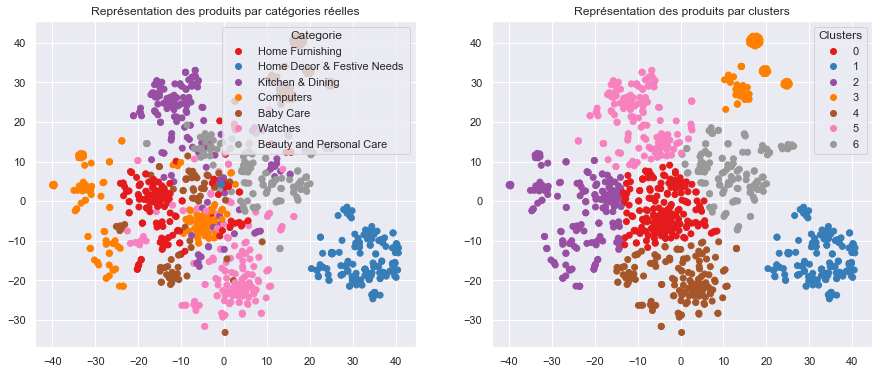

ARI :  0.453


In [81]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### <a name="C622"> 6.2.2) Term Frequency-Inverse Document Frequency (TF-IDF): <a/>
    
La "Term Frequency-Inverse Document Frequency" (TF-IDF) est une mesure statistique utilisée en traitement automatique du langage naturel pour évaluer l'importance d'un terme dans un document par rapport à une collection de documents.

#### a.) corpus : the first three element  of column "lemmatize_text"

##### Uni-gram

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# créer une fonction TFIDF
def TFIDF(data, ngram = 1, MAX_NB_WORDS = 75000):
    
    # Initialisation du vectoriseur BoW avec les paramètres spécifiés
    tfidf_x = TfidfVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    
    # Transforme les textes en une matrice de comptage de mots
    emb = tfidf_x.fit_transform(data).toarray()
    
    # Afficher le nombre de fonctionnalités extraites (correspondant au nombre de mots uniques)
    print("tf-idf with", str(np.array(emb).shape[1]), "features")
    
    return emb, tfidf_x

In [83]:
# faire une liste des trois premiers élement de la colonne "lemmatize_text"
test_corpus = data["lemmatize_text"][:3].tolist()
print("The test corpus: ", test_corpus, "\n")

# Appel de la fonction cv pour obtenir les objets
test_tfidf_em_1gram, test_tfidf_1gram = TFIDF(test_corpus, ngram=1)

# Appeler la fonction print_out avec les objets et le paramètre ngram
print_out(test_tfidf_em_1gram, test_tfidf_1gram, ngram="Uni-gram")

The test corpus:  ['elegance polyester multicolor abstract eyelet door curtain key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhances look interiorsthis curtain make 100 high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty give soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance design door type eyelet model name a

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Bi-gram

In [84]:
test_tfidf_em_2gram, test_tfidf_2gram = TFIDF(test_corpus, ngram=2)
print_out(test_tfidf_em_2gram, test_tfidf_2gram, ngram="Bi-gram")

tf-idf with 299 features
Bi-gram bag-of-words: 
['10 year', '100 cotton', '100 high', '100 soft', '20 piece', '20 sale', '213 cm', '23 cm', '23 cmsspecifications', '299 eurospa', '30 inch', '350 length', '360 type', '360eurospa cotton', '500 model', '60 inch', '899 curtain', 'absorbency softness', 'abstract eyelet', 'abstract polyester', 'amount sunlightspecifications', 'ant wrinkle', 'anti shrinkage', 'apart first', 'apparancegive home', 'appeal design', 'assorted bath', 'assorted dimension', 'assorted price', 'asvtwl322 color', 'attention sure', 'bath towel', 'beauty give', 'bleach flat', 'blue bath', 'blue size', 'body design', 'box number', 'boy girl', 'brand elegance', 'brand eurospa', 'brand last', 'brand sathiyas', 'bright modernistic', 'bright sun', 'bring exclusively', 'bring home', 'care skin', 'care wash', 'close evening', 'cm 23', 'cm box', 'cm height', 'cmsspecifications eurospa', 'cold water', 'color assorted', 'color may', 'color multicolor', 'color red', 'contemporary e

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Tri-gram

In [85]:
test_tfidf_em_3gram, test_tfidf_3gram = TFIDF(test_corpus, ngram=3)
print_out(test_tfidf_em_3gram, test_tfidf_3gram, ngram="Tri-gram")

tf-idf with 338 features
Tri-gram bag-of-words: 
['10 year famous', '100 cotton susceptible', '100 high quality', '100 soft cotton', '20 piece face', '20 sale package', '213 cm box', '213 cm height', '23 cm 23', '23 cmsspecifications eurospa', '299 eurospa bring', '30 inch width', '350 length inch', '360 type face', '360eurospa cotton terry', '500 model name', '60 inch box', '899 curtain enhances', 'absorbency softness durability', 'abstract eyelet door', 'abstract polyester door', 'amount sunlightspecifications elegance', 'ant wrinkle anti', 'anti shrinkage elegant', 'apart first thing', 'apparancegive home bright', 'appeal design surreal', 'assorted bath towel', 'assorted dimension weight', 'assorted price 299', 'asvtwl322 color red', 'attention sure steal', 'bath towel bath', 'bath towel feature', 'bath towel gsm', 'bath towel ideal', 'bath towel lot', 'bath towel red', 'bath towel sathiyas', 'bath towel specification', 'beauty give soothing', 'bleach flat dry', 'blue bath towel', '

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### b.) corpus : the entire element of column "lemmatize_text"

In [86]:
# implement into the whole dataset
data_corpus = data["lemmatize_text"].tolist()
data_em_1gram, vc_1gram = TFIDF(data_corpus, 1)
data_em_2gram, vc_2gram = TFIDF(data_corpus, 2)
data_em_3gram, vc_3gram = TFIDF(data_corpus, 3)

print(len(data_corpus))
print(data_em_1gram.shape)
print(data_em_2gram.shape)
print(data_em_3gram.shape)

tf-idf with 5926 features
tf-idf with 21460 features
tf-idf with 28404 features
1050
(1050, 5926)
(1050, 21460)
(1050, 28404)


#### Ari score et visualisalisation

In [87]:
# création du bag of words (Tf-idf)

tfidf_x = TfidfVectorizer(ngram_range = (1,1), max_features = 75000, max_df=0.85, min_df=1)
ctf_transform = tfidf_x.fit_transform(data_corpus).toarray()
ctf_transform.shape

(1050, 5926)

In [88]:
print("Tf-idfCountVectorizer : ")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idfCountVectorizer : 


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ARI :  0.4918 time :  6.0


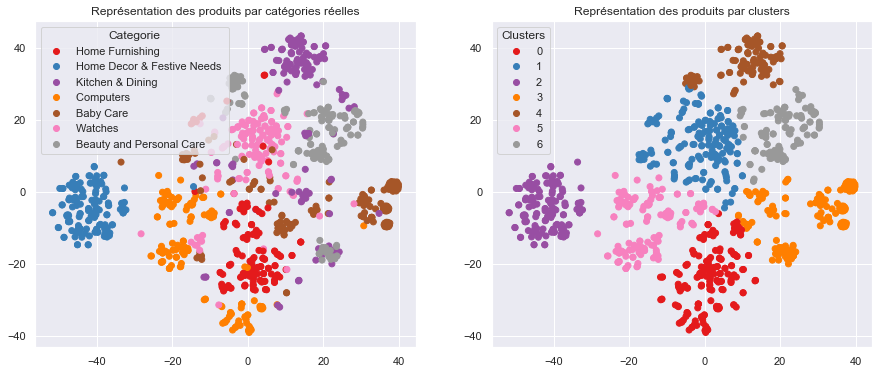

ARI :  0.4918


In [89]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### <a name="C623"> 6.2.3) Word2Vec :<a/>

Word2Vec est un algorithme d'apprentissage non supervisé qui permet de créer des représentations vectorielles de mots à partir de données textuelles. Ces représentations vectorielles capturent les relations sémantiques et syntaxiques entre les mots.
Word2Vec propose deux architectures principales : Skip-Gram et Continuous Bag-of-Words (CBOW) :

Dans l'architecture **Skip-Gram**, le modèle tente de prédire les mots environnants (contexte) à partir d'un mot donné.
Dans l'architecture **CBOW**, le modèle tente de prédire un mot donné en fonction des mots environnants (contexte)

In [90]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [91]:
import gensim
from gensim.models import Word2Vec

# Print("gensim version:", gensim.__version__)
word2vec_path = "./GoogleNews-vectors-negative300.bin"
# we only load 200k most common words from Google News corpus 
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=200000) 

In [92]:
# calculer le vecteur moyen des tokens dans la liste 
def get_average_vec(tokens_list, vector, generate_missing=False, k=300):
     
    if len(tokens_list)<1:
        return np.zeros(k)
    
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

In [93]:
# Création de la matrice d'embedding
def get_embeddings(vectors, text, generate_missing=False, k=300):

    embeddings = text.apply(lambda x: get_average_vec(x, vectors, generate_missing=generate_missing, k=k))
    return list(embeddings)

embeddings_word2vec = get_embeddings(word2vec_model, data["lemmatize_text"], k=300)

In [94]:
print("Embedding matrix size", len(embeddings_word2vec), len(embeddings_word2vec[0]),"\n")
print("The sentence: \"%s\" got embedding values: " % data["lemmatize_text"][0],"\n")

print(embeddings_word2vec[0])

Embedding matrix size 1050 300 

The sentence: "elegance polyester multicolor abstract eyelet door curtain key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhances look interiorsthis curtain make 100 high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty give soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance design d

#### Ari score et visualisalisation

In [95]:
# Convertir la liste en array
embeddings = np.array(embeddings_word2vec).round(4)
embeddings.shape

(1050, 300)

In [96]:
print("Embeddings_word2vec : ")
ARI, X_tsne, labels = ARI_fct(embeddings)

Embeddings_word2vec : 


C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ARI :  0.1783 time :  6.0


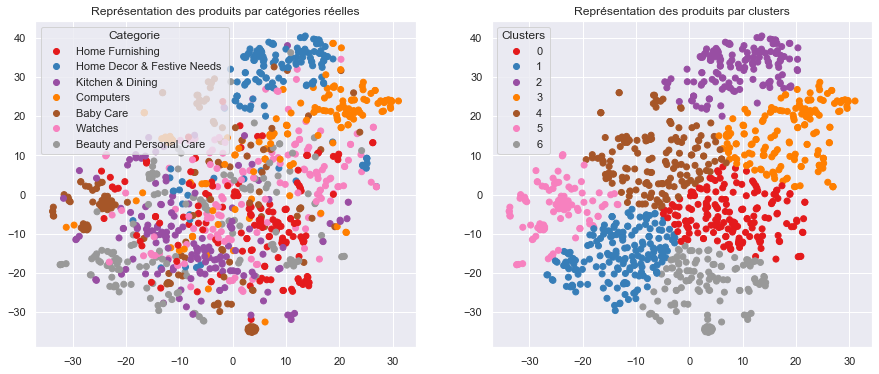

ARI :  0.1783


In [97]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### <a name="C624"> 5.2.4) BERT - Bidirectional Encoder Representations from Transformers <a/>
 
BERT (Bidirectional Encoder Representations from Transformers) est un modèle de langage pré-entraîné développé par Google en 2018. Il utilise l'architecture Transformer, qui est un réseau neuronal basé sur l'attention, pour capturer les relations contextuelles entre les mots dans un texte.

Contrairement aux modèles de langage traditionnels qui s'appuient sur des modèles de langage basés sur des séquences linéaires, BERT utilise une approche bidirectionnelle. Il prend en compte le contexte à la fois avant et après chaque mot dans une phrase pour construire des représentations vectorielles de chaque mot

#### BERT hub Tensorflow

In [98]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install bert-tensorflow

Note: you may need to restart the kernel to use updated packages.


In [100]:
from bert import tokenization
import tensorflow as tf
import tensorflow_hub as hub

import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers

os.environ["TF_KERAS"]='1'

In [101]:
from transformers import AutoTokenizer

# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [102]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [103]:
import tensorflow_hub as hub

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert

model_url = "./bert_en_uncased_L-12_H-768_A-12_4"
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [104]:
data['sentence_dl'] = data['lemmatize_text_unique']

In [105]:
max_length = 64
batch_size = 1
model_type = 'bert-base-uncased'
model = bert_layer

# Convertir la liste en array
sentences = data['sentence_dl'].to_list()

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode='TFhub')
features_bert.shape

C:\Users\dmedc\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dmedc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


temps traitement :  244.0


(1050, 768)

In [106]:
ARI, X_tsne, labels = ARI_fct(features_bert)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ARI :  0.3484 time :  7.0


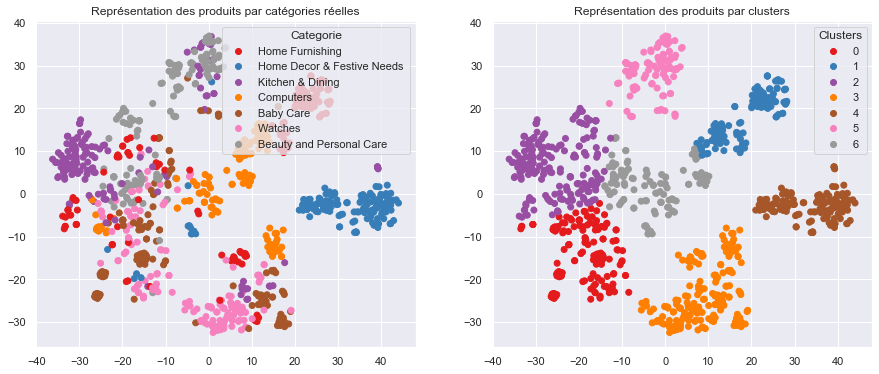

ARI :  0.3484


In [107]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### <a name="C624"> 6.2.4) USE - Universal Sentence Encoder <a/>
    
USE (Universal Sentence Encoder) est un modèle de représentation de phrases pré-entraîné développé par google qui capture les significations sémantiques universelles des phrases, indépendamment de leur langue ou de leur domaine.

In [108]:
import tensorflow_hub as hub

embed = hub.load("./universal-sentence-encoder_4")

In [109]:
# Création de la matrice d'embedding
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size   # C'est la taille du lot qui détermine combien de phrases sont traitées simultanément à chaque étape
    time1 = time.time()
    features = None 
    # Pour chaque lot, Extrait les embeddings en utilisant la fonction embed 
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [110]:
data['sentence_dl'] = data['lemmatize_text_unique']

In [111]:
batch_size = 1

# Convertir la liste en array
sentences = data['sentence_dl'].to_list()
features_USE = feature_USE_fct(sentences, batch_size)
features_USE.shape

(1050, 512)

In [112]:
ARI, X_tsne, labels = ARI_fct(features_USE)

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ARI :  0.3658 time :  8.0


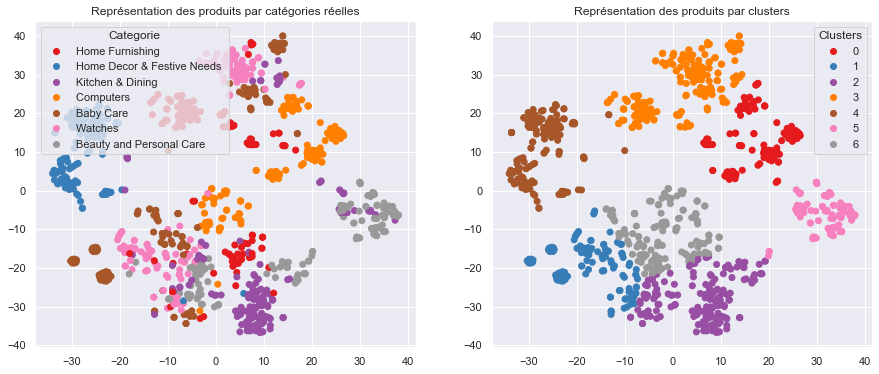

ARI :  0.3658


In [113]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

######  <a href="#C"> Retour Sommaire <a/>